<a href="https://colab.research.google.com/github/Gretakoutika/xxx/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib import pyplot     
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score, confusion_matrix,  roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay,classification_report 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
from sklearn import model_selection,neighbors, naive_bayes, neural_network, svm, tree, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 
import pandas.util.testing as tm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold


### **Data Description**

In [53]:
df = pd.read_csv('pd_speech_features1.csv')
df.drop(['id'], 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [3]:
df.head(5)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [56]:
df.shape

(756, 754)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


In [6]:
df.isnull().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [7]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

### **Preprocessing**

In [9]:
X=df.drop(columns=['class'],axis=1)
Y=df['class']

In [10]:
print(X)

     gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227        240               239   
1         1  0.76686  0.69481  0.53966        234               233   
2         1  0.85083  0.67604  0.58982        232               231   
3         0  0.41121  0.79672  0.59257        178               177   
4         0  0.32790  0.79782  0.53028        236               235   
..      ...      ...      ...      ...        ...               ...   
751       0  0.80903  0.56355  0.28385        417               416   
752       0  0.16084  0.56499  0.59194        415               413   
753       0  0.88389  0.72335  0.46815        381               380   
754       0  0.83782  0.74890  0.49823        340               339   
755       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0            0.008064            0.000087       0.00218      0.000018

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64


In [12]:
results=pd.DataFrame(columns=['model','accuracy','precision','F1-score','Sensitivity','Specificity','AUC'])

In [13]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [15]:
print(X_train.shape,print(X_test.shape),print(Y_train.shape),print(Y_test.shape))

(227, 753)
(529,)
(227,)
(529, 753) None None None


### **Model Training - Classification Trees**

In [129]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt.score(X_test,Y_test)

#predictions = model.predict(X_test)
#prediction

0.8061674008810573

In [17]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_prediction)
training_accuracy

1.0

In [18]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,X_test_prediction)
test_accuracy

0.7577092511013216

In [132]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(dt, X_train, Y_train, cv = kfold, scoring = scoring)
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)
print(np.mean(cv_results))
print(classification_report(Y_test, predictions))
cm=confusion_matrix(Y_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = dt.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
report=classification_report(Y_test, predictions,output_dict = True)
results.loc[0]=['Decision Tree',round(report['accuracy']*100,2),round(report['macro avg']['precision']*100,2),round(report['macro avg']['f1-score']*100,2),round(sensitivity*100,2),round(specificity*100,2),round(auc*100,2)]
results

77.5330396475771
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        60
           1       0.87      0.82      0.84       167

    accuracy                           0.78       227
   macro avg       0.72      0.74      0.72       227
weighted avg       0.79      0.78      0.78       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,77.53,71.62,72.39,65.00,82.04,73.52
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,86.24,0.83,0.80,0.59,0.95,90.13
9,DEEP3,85.98,0.82,0.78,0.61,0.94,90.28


### Model - SVM

In [20]:
X2=df.drop(columns=['class'],axis=1)
Y2=df['class']


In [21]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.3,random_state=2)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test=scaler.transform(X2_test)
svm=svm.SVC(kernel='rbf',probability=True)
svm.fit(X2_train,Y2_train)


SVC(probability=True)

In [22]:
X2_train_prediction = svm.predict(X2_train)
training_accuracy = accuracy_score(Y2_train,X2_train_prediction)
training_accuracy

0.8695652173913043

In [23]:
X2_test_prediction = svm.predict(X2_test)
test_accuracy = accuracy_score(Y2_test,X2_test_prediction)
test_accuracy

0.8237885462555066

In [24]:

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(svm, X2_train, Y2_train, cv = kfold, scoring = scoring)
svm.fit(X2_train, Y2_train)
predictions = svm.predict(X2_test)

print(accuracy_score(Y2_test, predictions)*100)

print(classification_report(Y2_test, predictions))
cm=confusion_matrix(Y2_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = svm.predict_proba(X2_test)[::,1]
auc = metrics.roc_auc_score(Y2_test, y_pred_proba)
report=classification_report(Y2_test, predictions,output_dict = True)
results.loc[1]=['SVM',round(report['accuracy']*100,2),round(report['macro avg']['precision']*100,2),round(report['macro avg']['f1-score']*100,2),round(sensitivity*100,2),round(specificity*100,2),round(auc*100,2)]
results

82.37885462555066
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        60
           1       0.82      0.98      0.89       167

    accuracy                           0.82       227
   macro avg       0.84      0.69      0.72       227
weighted avg       0.83      0.82      0.80       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86


### Model-KNN

In [25]:
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X,Y,test_size=0.3,random_state=2)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test=scaler.transform(X3_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X3_train,Y3_train)


KNeighborsClassifier()

In [26]:
X3_train_prediction = knn.predict(X3_train)
training_accuracy = accuracy_score(Y3_train,X3_train_prediction)
print(training_accuracy)
X3_test_prediction = knn.predict(X3_test)
test_accuracy = accuracy_score(Y3_test,X3_test_prediction)
test_accuracy

0.9338374291115312


0.8678414096916299

In [27]:

scoring = 'accuracy'

kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(knn, X3_train, Y3_train, cv = kfold, scoring = scoring)
knn.fit(X3_train, Y3_train)
predictions = knn.predict(X3_test)
print(accuracy_score(Y3_test, predictions)*100)
print(classification_report(Y3_test,predictions))
cm=confusion_matrix(Y3_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = knn.predict_proba(X3_test)[::,1]
auc = metrics.roc_auc_score(Y3_test, y_pred_proba)
report=classification_report(Y3_test, predictions,output_dict = True)
results.loc[2]=['KNN',round(report['accuracy'],2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(sensitivity,2),round(specificity,2),round(auc,2)]
results

86.78414096916299
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        60
           1       0.87      0.96      0.91       167

    accuracy                           0.87       227
   macro avg       0.86      0.78      0.81       227
weighted avg       0.87      0.87      0.86       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92


### Model-Logistic Regression

In [28]:
X4_train,X4_test,Y4_train,Y4_test=train_test_split(X,Y,test_size=0.3,random_state=2)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X4_train)
X4_train = scaler.transform(X4_train)
X4_test=scaler.transform(X4_test)
lr = LogisticRegression()
lr.fit(X4_train,Y4_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
X4_train_prediction = lr.predict(X4_train)
training_accuracy = accuracy_score(Y4_train,X4_train_prediction)
print(training_accuracy)
X4_test_prediction = lr.predict(X4_test)
test_accuracy = accuracy_score(Y4_test,X4_test_prediction)
test_accuracy

0.9376181474480151


0.8810572687224669

In [30]:

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(lr, X4_train, Y4_train, cv = kfold, scoring = scoring)
lr.fit(X4_train, Y4_train)
predictions = lr.predict(X4_test)
print(accuracy_score(Y4_test, predictions)*100)

print(classification_report(Y4_test, predictions))
cm=confusion_matrix(Y4_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = lr.predict_proba(X4_test)[::,1]
auc = metrics.roc_auc_score(Y4_test, y_pred_proba)
report=classification_report(Y4_test, predictions,output_dict = True)
results.loc[3]=['Logistic Regression',round(report['accuracy'],2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(sensitivity,2),round(specificity,2),round(auc,2)]
results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


88.10572687224669
              precision    recall  f1-score   support

           0       0.87      0.65      0.74        60
           1       0.88      0.96      0.92       167

    accuracy                           0.88       227
   macro avg       0.88      0.81      0.83       227
weighted avg       0.88      0.88      0.88       227



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92


### Model-Linear Discriminant Analysis

In [31]:
X5_train,X5_test,Y5_train,Y5_test=train_test_split(X,Y,test_size=0.3,random_state=2)

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X5_train)
X5_train = scaler.transform(X5_train)
X5_test=scaler.transform(X5_test)
lda = LinearDiscriminantAnalysis()
lda.fit(X5_train,Y5_train)


LinearDiscriminantAnalysis()

In [32]:
X5_train_prediction = lda.predict(X5_train)
training_accuracy = accuracy_score(Y5_train,X5_train_prediction)
print(training_accuracy)
X5_test_prediction = lda.predict(X5_test)
test_accuracy = accuracy_score(Y5_test,X5_test_prediction)
test_accuracy

1.0


0.7180616740088106

In [33]:

scoring = 'accuracy'

kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(lda, X5_train, Y5_train, cv = kfold, scoring = scoring)
lda.fit(X5_train, Y5_train)
predictions = lda.predict(X5_test)
print(accuracy_score(Y5_test, predictions)*100)
print(classification_report(Y5_test, predictions))
cm=confusion_matrix(Y5_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = lda.predict_proba(X2_test)[::,1]
auc = metrics.roc_auc_score(Y5_test, y_pred_proba)
report=classification_report(Y5_test, predictions,output_dict = True)
results.loc[4]=['LDA',round(report['accuracy'],2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(sensitivity,2),round(specificity,2),round(auc,2)]
results

71.80616740088107
              precision    recall  f1-score   support

           0       0.48      0.72      0.57        60
           1       0.88      0.72      0.79       167

    accuracy                           0.72       227
   macro avg       0.68      0.72      0.68       227
weighted avg       0.77      0.72      0.73       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75


### Model-Random Forest Classifier

In [34]:
X6_train,X6_test,Y6_train,Y6_test=train_test_split(X,Y,test_size=0.3,random_state=2)

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X6_train)
X6_train = scaler.transform(X6_train)
X6_test=scaler.transform(X6_test)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X6_train,Y6_train)


RandomForestClassifier()

In [35]:
X6_train_prediction = rf.predict(X6_train)
training_accuracy = accuracy_score(Y6_train,X6_train_prediction)
print(training_accuracy)
X6_test_prediction = rf.predict(X6_test)
test_accuracy = accuracy_score(Y6_test,X6_test_prediction)
test_accuracy

1.0


0.8634361233480177

In [36]:

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(rf, X6_train, Y6_train, cv = kfold, scoring = scoring)
rf.fit(X6_train, Y6_train)
predictions = rf.predict(X6_test)
print(accuracy_score(Y6_test, predictions)*100)
print(classification_report(Y6_test, predictions))
cm=confusion_matrix(Y6_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = rf.predict_proba(X6_test)[::,1]
auc = metrics.roc_auc_score(Y6_test, y_pred_proba)
report=classification_report(Y6_test, predictions,output_dict = True)
results.loc[5]=['RF',round(report['accuracy'],2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(sensitivity,2),round(specificity,2),round(auc,2)]
results

84.14096916299559
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        60
           1       0.84      0.98      0.90       167

    accuracy                           0.84       227
   macro avg       0.86      0.72      0.75       227
weighted avg       0.85      0.84      0.82       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94


### Model- AdaBoost

In [37]:
X7_train,X7_test,Y7_train,Y7_test=train_test_split(X,Y,test_size=0.3,random_state=2)
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X7_train)
X7_train = scaler.transform(X7_train)
X7_test=scaler.transform(X7_test)
dt_boost = AdaBoostClassifier(random_state = 2, base_estimator=tree.DecisionTreeClassifier(random_state = 42, max_depth=1), n_estimators= 100, learning_rate = 1)
dt_boost.fit(X7_train,Y7_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   learning_rate=1, n_estimators=100, random_state=2)

In [38]:
X7_train_prediction = dt_boost.predict(X7_train)
training_accuracy = accuracy_score(Y7_train,X7_train_prediction)
print(training_accuracy)
X7_test_prediction =  dt_boost.predict(X7_test)
test_accuracy = accuracy_score(Y7_test,X7_test_prediction)
test_accuracy

1.0


0.8634361233480177

In [124]:

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = model_selection.cross_val_score(dt_boost, X7_train, Y7_train, cv = kfold, scoring = scoring)
print(cv_results)
dt_boost.fit(X7_train, Y7_train)
predictions = dt_boost.predict(X7_test)
print(np.mean(cv_results))
print(classification_report(Y7_test,predictions))
cm=confusion_matrix(Y7_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
y_pred_proba = dt_boost.predict_proba(X7_test)[::,1]
auc = metrics.roc_auc_score(Y7_test, y_pred_proba)
report=classification_report(Y7_test, predictions,output_dict = True)
results.loc[6]=['AdaBoost',round(report['accuracy'],2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(sensitivity,2),round(specificity,2),round(auc,2)]
results

[0.85849057 0.83018868 0.89622642 0.8490566  0.86666667]
0.8601257861635221
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        60
           1       0.90      0.92      0.91       167

    accuracy                           0.86       227
   macro avg       0.83      0.81      0.82       227
weighted avg       0.86      0.86      0.86       227



,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,86.24,0.83,0.80,0.59,0.95,90.13
9,DEEP3,85.98,0.82,0.78,0.61,0.94,90.28


In [40]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92


### **Model - Deep1**

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [118]:
# accuracy_frame=pd.DataFrame(columns=['DEEP1','DEEP2','DEEP3'])
# accuracy_frame
# # metrics = pd.DataFrame(columns=['acc_per_fold','sensitivity_per_fold','specificity_per_fold','auc_per_fold'])
# # metrics.head()
# # metrics['acc_per_fold']=acc_per_fold
# # metrics['sensitivity_per_fold']=sensitivity_per_fold
# # metrics['specificity_per_fold']=specificity_per_fold
# # metrics['auc_per_fold']=auc_per_fold
# # metrics.plot(kind = 'box', subplots = True, layout = (3,3))
# # pyplot.show()

,DEEP1,DEEP2,DEEP3


In [42]:
X8_train,X8_test,Y8_train,Y8_test=train_test_split(X,Y,test_size=0.3)
X8_train.shape
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X8_train)
X8_train = scaler.transform(X8_train)
X8_test=scaler.transform(X8_test)

In [72]:

acc_per_fold = []
loss_per_fold = []
precision_per_fold=[]
f1_score_per_fold=[]
sensitivity_per_fold=[]
specificity_per_fold=[]
auc_per_fold=[]

inputs = np.concatenate((X8_train, X8_test), axis=0)
targets = np.concatenate((Y8_train, Y8_test), axis=0)


kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):

  deep1 = Sequential()
  deep1.add(Dense(40,input_dim=753,activation='relu'))
  deep1.add(Dense(20,activation='relu'))
  deep1.add(Dense(1,activation='sigmoid'))


  
  sgd = SGD(lr=0.01)
  deep1.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print('Training for fold {fold_no} ...')

  callback_a=EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)
  callback_b=ModelCheckpoint(filepath='best_deep1model.hd5',monitor='val_loss',save_best_only=True) 
  history=deep1.fit(inputs[train],targets[train],validation_data=(inputs[test],targets[test]),epochs=100,batch_size=16,callbacks=[callback_a,callback_b])

  

  deep1.load_weights('best_deep1model.hd5')
  scores = deep1.evaluate(inputs[test],targets[test])
  print(f'Score for fold {fold_no}: {deep1.metrics_names[0]} of {scores[0]}; {deep1.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  predictions = deep1.predict(inputs[test]).round()
  cm=confusion_matrix(targets[test], predictions)
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  y_pred = deep1.predict(inputs[test])
  auc = metrics.roc_auc_score(targets[test], y_pred)
  auc_per_fold.append(auc* 100)
  sensitivity_per_fold.append(sensitivity)
  specificity_per_fold.append(specificity)
  
  fold_no = fold_no + 1

print(f"== Provide average scores ==")
report=classification_report(targets[test], predictions,output_dict = True)
print(report)
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
#print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> AUC: {np.mean(auc_per_fold)} (+- {np.std(auc_per_fold)})')
print(f'> Senitivity: {np.mean(sensitivity_per_fold)} (+- {np.std(sensitivity_per_fold)})')
print(f'> Specificity: {np.mean(specificity_per_fold)} (+- {np.std(specificity_per_fold)})')
accuracy_frame['DEEP1']=acc_per_fold
print('------------------------------------------------------------------------')
results.loc[7]=['DEEP1',round(np.mean(acc_per_fold),2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(np.mean(sensitivity_per_fold),2),round(np.mean(specificity_per_fold),2),round(np.mean(auc_per_fold),2)]
print(results)

------------------------------------------------------------------------
Training for fold {fold_no} ...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5496 - accuracy: 0.7517 - val_loss: 0.5508 - val_accuracy: 0.7237
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5106 - accuracy: 0.7517 - val_loss: 0.5328 - val_accuracy: 0.7237
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4902 - accuracy: 0.7550 - val_loss: 0.5077 - val_accuracy: 0.7303
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4703 - accuracy: 0.7649 - val_loss: 0.4915 - val_accuracy: 0.7566
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4516 - accuracy: 0.7765 - val_loss: 0.4749 - val_accuracy: 0.7895
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4381 - accuracy: 0.8030 - val_loss: 0.4655 - val_accuracy: 0.7763
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4239 - accuracy: 0.8113 - val_loss: 0.4603 - val_accuracy: 0.7961
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.6323 - accuracy: 0.6678 - val_loss: 0.5478 - val_accuracy: 0.7748
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.5695 - accuracy: 0.7388 - val_loss: 0.5320 - val_accuracy: 0.7748
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5602 - accuracy: 0.7388 - val_loss: 0.5282 - val_accuracy: 0.7748
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5537 - accuracy: 0.7388 - val_loss: 0.5248 - val_accuracy: 0.7748
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5474 - accuracy: 0.7388 - val_loss: 0.5128 - val_accuracy: 0.7748
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5406 - accuracy: 0.7388 - val_loss: 0.5049 - val_accuracy: 0.7748
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7388 - val_loss: 0.5061 - val_accuracy: 0.7748
Epoch 8/100
38/38 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5676 - accuracy: 0.7471 - val_loss: 0.6117 - val_accuracy: 0.6954
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5294 - accuracy: 0.7603 - val_loss: 0.5881 - val_accuracy: 0.6954
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5100 - accuracy: 0.7603 - val_loss: 0.5812 - val_accuracy: 0.6954
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4939 - accuracy: 0.7603 - val_loss: 0.5555 - val_accuracy: 0.6954
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4745 - accuracy: 0.7603 - val_loss: 0.5226 - val_accuracy: 0.6887
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7769 - val_loss: 0.5697 - val_accuracy: 0.6954
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4542 - accuracy: 0.7802 - val_loss: 0.5151 - val_accuracy: 0.6954
Epoch 8/100
38/38 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5916 - accuracy: 0.7256 - val_loss: 0.5711 - val_accuracy: 0.7351
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5528 - accuracy: 0.7504 - val_loss: 0.5594 - val_accuracy: 0.7351
Epoch 3/100
38/38 [==============================] - 1s 18ms/step - loss: 0.5452 - accuracy: 0.7504 - val_loss: 0.5462 - val_accuracy: 0.7351
Epoch 4/100
38/38 [==============================] - 1s 18ms/step - loss: 0.5353 - accuracy: 0.7504 - val_loss: 0.5359 - val_accuracy: 0.7351
Epoch 5/100
38/38 [==============================] - 1s 35ms/step - loss: 0.5287 - accuracy: 0.7504 - val_loss: 0.5169 - val_accuracy: 0.7351
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5107 - accuracy: 0.7504 - val_loss: 0.5096 - val_accuracy: 0.7417
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.5053 - accuracy: 0.7521 - val_loss: 0.4868 - val_accuracy: 0.7351
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 2s 20ms/step - loss: 0.5932 - accuracy: 0.7124 - val_loss: 0.4931 - val_accuracy: 0.8013
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5466 - accuracy: 0.7339 - val_loss: 0.4762 - val_accuracy: 0.8013
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5328 - accuracy: 0.7339 - val_loss: 0.4695 - val_accuracy: 0.8013
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5160 - accuracy: 0.7355 - val_loss: 0.4604 - val_accuracy: 0.8013
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5037 - accuracy: 0.7405 - val_loss: 0.4460 - val_accuracy: 0.8013
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4910 - accuracy: 0.7438 - val_loss: 0.4375 - val_accuracy: 0.8013
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4773 - accuracy: 0.7603 - val_loss: 0.4291 - val_accuracy: 0.7947
Epoch 8/100
38/38 

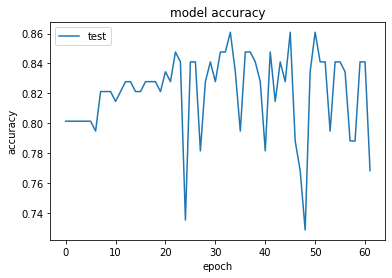

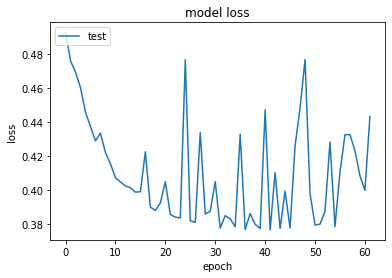

In [73]:

plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

In [74]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,87.17,0.86,0.82,0.65,0.95,90.78
9,DEEP3,86.11,0.82,0.77,0.63,0.94,89.86


### Model - Deep 2

In [75]:

acc_per_fold = []
loss_per_fold = []
precision_per_fold=[]
f1_score_per_fold=[]
sensitivity_per_fold=[]
specificity_per_fold=[]
auc_per_fold=[]

inputs = np.concatenate((X8_train, X8_test), axis=0)
targets = np.concatenate((Y8_train, Y8_test), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):

  deep2 = Sequential()
  deep2.add(Dense(20,input_dim=753,activation='relu'))
  deep2.add(Dense(20,activation='relu'))
  deep2.add(Dense(1,activation='sigmoid'))


  sgd = SGD(lr=0.01)
  deep2.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print('Training for fold {fold_no} ...')

 
  callback_a=EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)
  callback_b=ModelCheckpoint(filepath='best_deep2model.hd5',monitor='val_loss', save_best_only=True) 
  history=deep2.fit(inputs[train], targets[train],validation_data=(inputs[test], targets[test]),epochs=100,batch_size=16,callbacks=[callback_a,callback_b])


  deep2.load_weights('best_deep2model.hd5')
  scores = deep2.evaluate(inputs[test], targets[test])
  print(f'Score for fold {fold_no}: {deep2.metrics_names[0]} of {scores[0]}; {deep2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  predictions = deep2.predict(inputs[test]).round()
  cm=confusion_matrix(targets[test], predictions)
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  y_pred = deep2.predict(inputs[test])
  auc = metrics.roc_auc_score(targets[test], y_pred)
  auc_per_fold.append(auc* 100)
  sensitivity_per_fold.append(sensitivity)
  specificity_per_fold.append(specificity)

  fold_no = fold_no + 1

report=classification_report(targets[test], predictions,output_dict = True)
print(report)
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
#print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> AUC: {np.mean(auc_per_fold)} (+- {np.std(auc_per_fold)})')
print(f'> Senitivity: {np.mean(sensitivity_per_fold)} (+- {np.std(sensitivity_per_fold)})')
print(f'> Specificity: {np.mean(specificity_per_fold)} (+- {np.std(specificity_per_fold)})')

print('------------------------------------------------------------------------')
results.loc[8]=['DEEP2',round(np.mean(acc_per_fold),2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(np.mean(sensitivity_per_fold),2),round(np.mean(specificity_per_fold),2),round(np.mean(auc_per_fold),2)]

------------------------------------------------------------------------
Training for fold {fold_no} ...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 22ms/step - loss: 0.5692 - accuracy: 0.7268 - val_loss: 0.5978 - val_accuracy: 0.7171
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5396 - accuracy: 0.7550 - val_loss: 0.5725 - val_accuracy: 0.7171
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5282 - accuracy: 0.7550 - val_loss: 0.5586 - val_accuracy: 0.7171
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5178 - accuracy: 0.7550 - val_loss: 0.5462 - val_accuracy: 0.7171
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5023 - accuracy: 0.7550 - val_loss: 0.5335 - val_accuracy: 0.7237
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4857 - accuracy: 0.7599 - val_loss: 0.5316 - val_accuracy: 0.7237
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4738 - accuracy: 0.7699 - val_loss: 0.5192 - val_accuracy: 0.7237
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 22ms/step - loss: 0.5830 - accuracy: 0.7355 - val_loss: 0.5369 - val_accuracy: 0.7748
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5393 - accuracy: 0.7405 - val_loss: 0.5080 - val_accuracy: 0.7748
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5168 - accuracy: 0.7405 - val_loss: 0.5063 - val_accuracy: 0.7682
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5001 - accuracy: 0.7504 - val_loss: 0.4845 - val_accuracy: 0.7748
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4858 - accuracy: 0.7554 - val_loss: 0.4757 - val_accuracy: 0.7881
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7934 - val_loss: 0.4841 - val_accuracy: 0.7947
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4454 - accuracy: 0.8099 - val_loss: 0.4563 - val_accuracy: 0.7748
Epoch 8/100
38/38 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 20ms/step - loss: 0.5916 - accuracy: 0.7157 - val_loss: 0.5520 - val_accuracy: 0.7417
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5399 - accuracy: 0.7488 - val_loss: 0.5371 - val_accuracy: 0.7417
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5268 - accuracy: 0.7488 - val_loss: 0.5258 - val_accuracy: 0.7417
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5167 - accuracy: 0.7488 - val_loss: 0.5086 - val_accuracy: 0.7417
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4956 - accuracy: 0.7587 - val_loss: 0.5069 - val_accuracy: 0.7417
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4799 - accuracy: 0.7686 - val_loss: 0.4807 - val_accuracy: 0.8013
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.4699 - accuracy: 0.7851 - val_loss: 0.4572 - val_accuracy: 0.7748
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5898 - accuracy: 0.7256 - val_loss: 0.5036 - val_accuracy: 0.7947
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5590 - accuracy: 0.7355 - val_loss: 0.4933 - val_accuracy: 0.7947
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.5384 - accuracy: 0.7355 - val_loss: 0.4595 - val_accuracy: 0.7947
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5169 - accuracy: 0.7388 - val_loss: 0.4477 - val_accuracy: 0.8079
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4942 - accuracy: 0.7455 - val_loss: 0.4207 - val_accuracy: 0.7947
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4828 - accuracy: 0.7620 - val_loss: 0.4017 - val_accuracy: 0.8079
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4655 - accuracy: 0.7818 - val_loss: 0.3935 - val_accuracy: 0.8411
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 20ms/step - loss: 0.5254 - accuracy: 0.7570 - val_loss: 0.5562 - val_accuracy: 0.7020
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4957 - accuracy: 0.7570 - val_loss: 0.5472 - val_accuracy: 0.7020
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4719 - accuracy: 0.7603 - val_loss: 0.5183 - val_accuracy: 0.7285
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4612 - accuracy: 0.7736 - val_loss: 0.5144 - val_accuracy: 0.7152
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4452 - accuracy: 0.7851 - val_loss: 0.4858 - val_accuracy: 0.7815
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4324 - accuracy: 0.8083 - val_loss: 0.4776 - val_accuracy: 0.7947
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4247 - accuracy: 0.8132 - val_loss: 0.4691 - val_accuracy: 0.7815
Epoch 8/100
38/38 

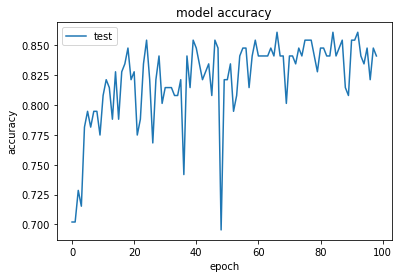

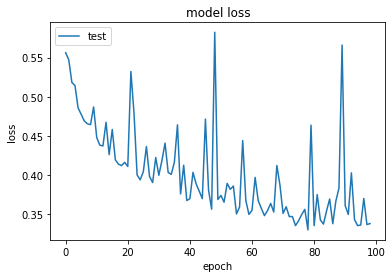

In [76]:

plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

In [77]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,86.24,0.83,0.80,0.59,0.95,90.13
9,DEEP3,86.11,0.82,0.77,0.63,0.94,89.86


### Model - Deep 3

In [78]:

acc_per_fold = []
loss_per_fold = []
precision_per_fold=[]
f1_score_per_fold=[]
sensitivity_per_fold=[]
specificity_per_fold=[]
auc_per_fold=[]

inputs = np.concatenate((X8_train, X8_test), axis=0)
targets = np.concatenate((Y8_train, Y8_test), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):

  deep3 = Sequential()
  deep3.add(Dense(20,input_dim=753,activation='relu'))
  deep3.add(Dense(10,activation='relu'))
  deep3.add(Dense(1,activation='sigmoid'))

  
  sgd = SGD(lr=0.01)
  deep3.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  callback_a=EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)
  callback_b=ModelCheckpoint(filepath='best_deep3model.hd5',monitor='val_loss', save_best_only=True) 
  history=deep3.fit(inputs[train], targets[train],validation_data=(inputs[test], targets[test]),epochs=100,batch_size=16,callbacks=[callback_a,callback_b])


  deep3.load_weights('best_deep3model.hd5')
  scores = deep3.evaluate(inputs[test], targets[test])
  print(f'Score for fold {fold_no}: {deep3.metrics_names[0]} of {scores[0]}; {deep3.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  predictions = deep3.predict(inputs[test]).round()
  cm=confusion_matrix(targets[test], predictions)
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  y_pred = deep3.predict(inputs[test])
  auc = metrics.roc_auc_score(targets[test], y_pred)
  auc_per_fold.append(auc* 100)
  sensitivity_per_fold.append(sensitivity)
  specificity_per_fold.append(specificity)
  
  fold_no = fold_no + 1

report=classification_report(targets[test], predictions,output_dict = True)
print(report)
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
#print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> AUC: {np.mean(auc_per_fold)} (+- {np.std(auc_per_fold)})')
print(f'> Senitivity: {np.mean(sensitivity_per_fold)} (+- {np.std(sensitivity_per_fold)})')
print(f'> Specificity: {np.mean(specificity_per_fold)} (+- {np.std(specificity_per_fold)})')

print('------------------------------------------------------------------------')
results.loc[9]=['DEEP3',round(np.mean(acc_per_fold),2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(np.mean(sensitivity_per_fold),2),round(np.mean(specificity_per_fold),2),round(np.mean(auc_per_fold),2)]

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.6170 - accuracy: 0.7185 - val_loss: 0.5679 - val_accuracy: 0.7434
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5517 - accuracy: 0.7467 - val_loss: 0.5491 - val_accuracy: 0.7434
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5416 - accuracy: 0.7467 - val_loss: 0.5423 - val_accuracy: 0.7434
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5349 - accuracy: 0.7467 - val_loss: 0.5350 - val_accuracy: 0.7434
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5270 - accuracy: 0.7467 - val_loss: 0.5283 - val_accuracy: 0.7434
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5204 - accuracy: 0.7467 - val_loss: 0.5188 - val_accuracy: 0.7434
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5109 - accuracy: 0.7467 - val_loss: 0.5090 - val_accuracy: 0.7434
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5487 - accuracy: 0.7355 - val_loss: 0.5334 - val_accuracy: 0.7351
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5082 - accuracy: 0.7504 - val_loss: 0.5042 - val_accuracy: 0.7417
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4846 - accuracy: 0.7669 - val_loss: 0.4979 - val_accuracy: 0.7351
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4691 - accuracy: 0.7636 - val_loss: 0.4670 - val_accuracy: 0.7550
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4477 - accuracy: 0.7917 - val_loss: 0.4611 - val_accuracy: 0.7550
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4336 - accuracy: 0.8116 - val_loss: 0.4589 - val_accuracy: 0.7550
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4295 - accuracy: 0.8116 - val_loss: 0.4442 - val_accuracy: 0.7881
Epoch 8/100
38/38 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 21ms/step - loss: 0.5565 - accuracy: 0.7504 - val_loss: 0.5482 - val_accuracy: 0.7285
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7504 - val_loss: 0.5509 - val_accuracy: 0.7285
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5093 - accuracy: 0.7504 - val_loss: 0.5048 - val_accuracy: 0.7285
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4903 - accuracy: 0.7504 - val_loss: 0.4801 - val_accuracy: 0.7285
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4792 - accuracy: 0.7504 - val_loss: 0.4674 - val_accuracy: 0.7285
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4674 - accuracy: 0.7504 - val_loss: 0.4578 - val_accuracy: 0.7285
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4589 - accuracy: 0.7521 - val_loss: 0.4417 - val_accuracy: 0.7285
Epoch 8/100
38/38 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


INFO:tensorflow:Assets written to: best_deep3model.hd5/assets
38/38 [==============================] - 1s 21ms/step - loss: 0.6387 - accuracy: 0.6413 - val_loss: 0.4999 - val_accuracy: 0.8344
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.7256 - val_loss: 0.5049 - val_accuracy: 0.8344
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5731 - accuracy: 0.7256 - val_loss: 0.4623 - val_accuracy: 0.8344
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7256 - val_loss: 0.4632 - val_accuracy: 0.8344
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.5451 - accuracy: 0.7273 - val_loss: 0.4348 - val_accuracy: 0.8344
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7339 - val_loss: 0.4463 - val_accuracy: 0.8411
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.5146 - accuracy: 0.7388 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


38/38 [==============================] - 1s 20ms/step - loss: 0.5421 - accuracy: 0.7603 - val_loss: 0.5991 - val_accuracy: 0.6887
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4931 - accuracy: 0.7620 - val_loss: 0.5678 - val_accuracy: 0.6887
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4763 - accuracy: 0.7636 - val_loss: 0.5661 - val_accuracy: 0.6887
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.7702 - val_loss: 0.5766 - val_accuracy: 0.6887
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4471 - accuracy: 0.7818 - val_loss: 0.5336 - val_accuracy: 0.7483
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4317 - accuracy: 0.7983 - val_loss: 0.5334 - val_accuracy: 0.7417
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.4204 - accuracy: 0.8050 - val_loss: 0.5333 - val_accuracy: 0.7483
Epoch 8/100
38/38 [

In [87]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,86.24,0.83,0.80,0.59,0.95,90.13
9,DEEP3,85.98,0.82,0.78,0.61,0.94,90.28


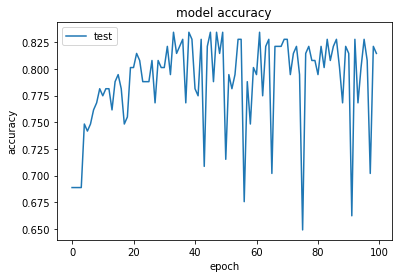

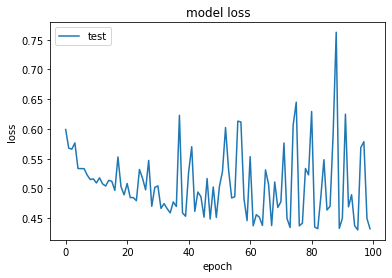

In [89]:

plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

### Ensemble Deep learning methods

In [81]:
from keras.models import load_model
n_members = 3
models = list()
for i in range(n_members):
	#best_deep3model.hd5
	filename = 'best_deep' + str(i + 1) + 'model.hd5'
	model = load_model(filename)
	models.append(model)

In [82]:
def ensemble_predictions(models, X8_test):
  outcomes = [model.predict(X8_test) for model in models]
  outcomes = np.array(outcomes)
  ensemble_prediction = np.round(np.average(outcomes, axis=0),0)
  return ensemble_prediction
  # ensemble_accuracy = accuracy_score(Y8_test, ensemble_prediction)
  # return ensemble_accuracy

In [83]:
# def evaluate_n_models(models, n_models, X8_test, Y8_test):
  
#   subset = models[:n_models]
#   print(subset)
#   outcome = ensemble_predictions(subset, X8_test)
#   return accuracy_score(Y8_test, outcome)
 

8/8 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8458
[<keras.engine.sequential.Sequential object at 0x7ff13d71b250>, <keras.engine.sequential.Sequential object at 0x7ff13d6fc8d0>]
8/8 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8899
[<keras.engine.sequential.Sequential object at 0x7ff13d71b250>, <keras.engine.sequential.Sequential object at 0x7ff13d6fc8d0>, <keras.engine.sequential.Sequential object at 0x7ff13d58ea10>]
8/8 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8899
Individual scores
[0.8458150029182434, 0.8898678421974182, 0.8898678421974182]
ensemble scores
[0.8458149779735683, 0.8634361233480177, 0.8810572687224669]


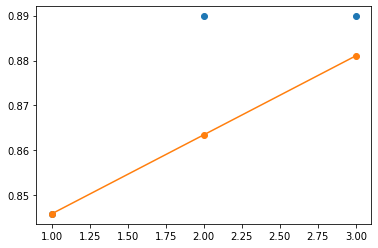

In [84]:
single_scores, ensemble_scores = list(), list()
for i in range(1, len(models)+1):
  ensemble_score = evaluate_n_models(models, i, X8_test, Y8_test)
  single_score = models[i-1].evaluate(X8_test, Y8_test)
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score[1])

print("Individual scores")
print(single_scores)
print("ensemble scores")
print(ensemble_scores)

x_axis = [i for i in range(1, len(models)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [85]:

acc_per_fold = []
loss_per_fold = []
precision_per_fold=[]
f1_score_per_fold=[]
sensitivity_per_fold=[]
specificity_per_fold=[]
auc_per_fold=[]

inputs = np.concatenate((X8_train, X8_test), axis=0)
targets = np.concatenate((Y8_train, Y8_test), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  print(f'Score for fold {fold_no}:')
  outcome = ensemble_predictions(models, inputs[test])
  ensemble_score=accuracy_score(targets[test], outcome)
  ensemble_scores.append(ensemble_score)
  print("ensemble score:")
  print(ensemble_score)
  
  
  acc_per_fold.append(ensemble_score * 100)
  #loss_per_fold.append(scores[0])
  #predictions = deep3.predict(X8_test).round()
  cm=confusion_matrix(targets[test], outcome)
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  #y_pred = deep3.predict(X8_test)
  auc = metrics.roc_auc_score(targets[test], outcome)
  auc_per_fold.append(auc* 100)
  sensitivity_per_fold.append(sensitivity)
  specificity_per_fold.append(specificity)
  
  fold_no = fold_no + 1

report=classification_report(targets[test], outcome,output_dict = True)
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
#print(f'> Loss: {np.mean(loss_per_fold)}')
#print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> AUC: {np.mean(auc_per_fold)} (+- {np.std(auc_per_fold)})')
print(f'> Senitivity: {np.mean(sensitivity_per_fold)} (+- {np.std(sensitivity_per_fold)})')
print(f'> Specificity: {np.mean(specificity_per_fold)} (+- {np.std(specificity_per_fold)})')

print('------------------------------------------------------------------------')
results.loc[10]=['DEEP_EN',round(np.mean(acc_per_fold),2),round(report['macro avg']['precision'],2),round(report['macro avg']['f1-score'],2),round(np.mean(sensitivity_per_fold),2),round(np.mean(specificity_per_fold),2),round(np.mean(auc_per_fold),2)]

Score for fold 1:
ensemble score:
0.9013157894736842
Score for fold 2:
ensemble score:
0.8940397350993378
Score for fold 3:
ensemble score:
0.8874172185430463
Score for fold 4:
ensemble score:
0.9072847682119205
Score for fold 5:
ensemble score:
0.8807947019867549
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 89.41704426629488 (+- 0.9461237495885021)
> AUC: 82.88376695694538 (+- 2.8222403587916025)
> Senitivity: 0.6984473396238101 (+- 0.0603059197348027)
> Specificity: 0.9592279995150973 (+- 0.011717907660953934)
------------------------------------------------------------------------


In [127]:
results

,model,accuracy,precision,F1-score,Sensitivity,Specificity,AUC
0,Decision Tree,0.80,0.74,0.75,0.72,0.83,0.77
1,SVM,0.82,0.84,0.72,0.40,0.98,0.86
2,KNN,0.87,0.86,0.81,0.60,0.96,0.92
3,Logistic Regression,0.88,0.88,0.83,0.65,0.96,0.92
4,LDA,0.72,0.68,0.68,0.72,0.72,0.75
5,RF,0.84,0.86,0.75,0.47,0.98,0.94
6,AdaBoost,0.86,0.83,0.82,0.70,0.92,0.92
7,DEEP1,87.04,0.79,0.71,0.63,0.95,89.94
8,DEEP2,86.24,0.83,0.80,0.59,0.95,90.13
9,DEEP3,85.98,0.82,0.78,0.61,0.94,90.28


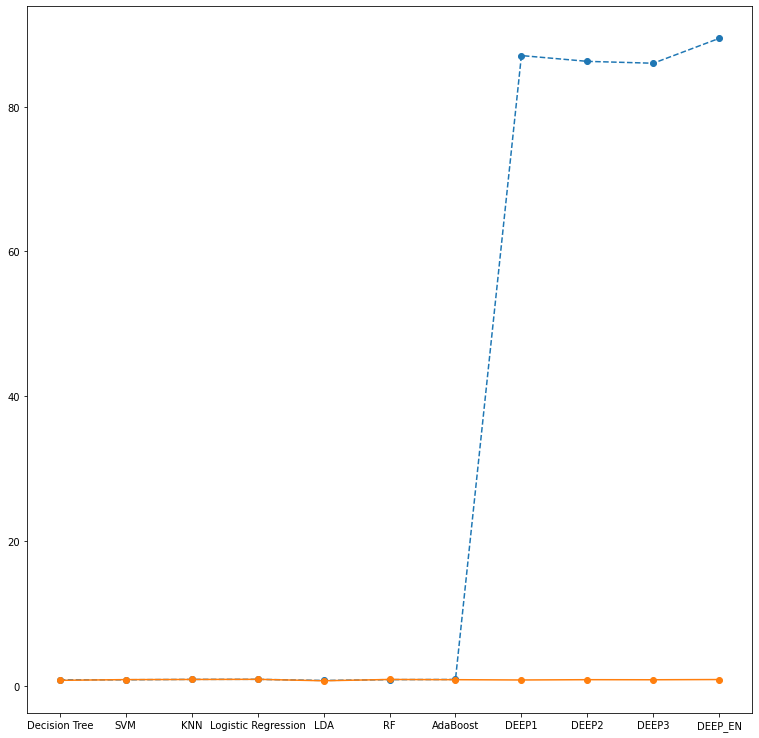

In [126]:
all_models=np.array(results['model'])
x_axis = [i for i in all_models]
pyplot.plot(x_axis, results['accuracy'], marker='o', linestyle='dashed')
pyplot.plot(x_axis, results['precision'], marker='o')
pyplot.show()